In [ ]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
import os

In [ ]:
dir_train = '/drive/MyDrive/ContoursData/Train/TrainData'
dir_test = '/drive/MyDrive/ContoursData/Test/TestData'

In [ ]:
from PIL import Image
def get_heightwitdh(path):
  img = Image.open(path)
  width = img.width
  height = img.height
  return height,width

In [ ]:
# Hàm tìm và vẽ contours lên ảnh
list_pre = []
list_mask = []
def Contour1(folder):
  for filename in sorted(os.listdir(folder)):
    img_path = os.path.join(folder,filename)
    img = cv2.imread(img_path)

    img_cp = img.copy()
    # Blurring for removing the noise 
    img_blur = cv2.bilateralFilter(img_cp, d = 7, 
                                  sigmaSpace = 75, sigmaColor =75)
    # Convert to grayscale 
    img_gray = cv2.cvtColor(img_blur, cv2.COLOR_RGB2GRAY)
    # Apply the thresholding
    a = img_gray.max()  
    _, thresh = cv2.threshold(img_gray, a/2+60, a,cv2.THRESH_BINARY_INV)
    
    #cv2_imshow(thresh)
    

    # Apply Canny
    canny = cv2.Canny(img_gray, 175,255)
    #cv2_imshow(canny)

    #Find the contour of the figure 
    contours, hierarchies = cv2.findContours(canny, cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
    
    # Create mask 
    h,w = get_heightwitdh(img_path)
    mask = np.zeros((h,w), np.uint8)
    mask1 = np.zeros((h,w), np.uint8)
    mask1.fill(0)
    #Test
    for contour in range(len(contours)):
      if contour != 1:
        cv2.fillConvexPoly(mask1,contours[contour],(255,255,255))
    # Draw the contour 
    img_copy1 = img.copy()
    #final = cv2.drawContours(mask, [contours_st] , - 1, 255, -1)
    final = cv2.drawContours(mask, contours, contourIdx = -1, 
                          color = (255, 255, 255), thickness = 1)
    list_pre.append(final)
    list_mask.append(mask1)
    #cv2_imshow(final)

In [ ]:
Contour1(dir_train)

In [ ]:
len(list_mask)

9

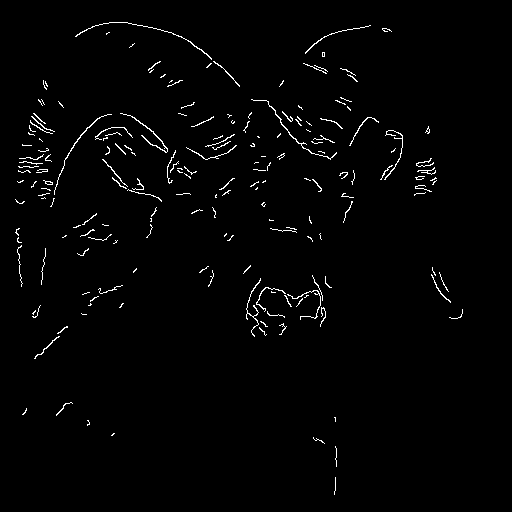

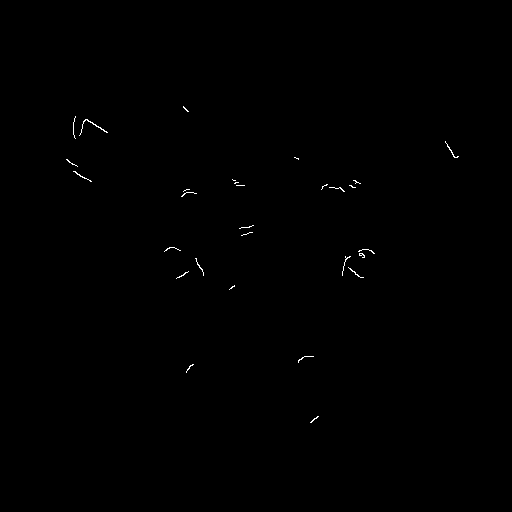

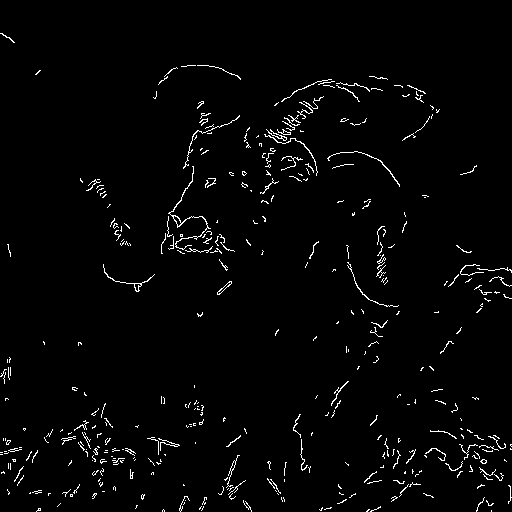

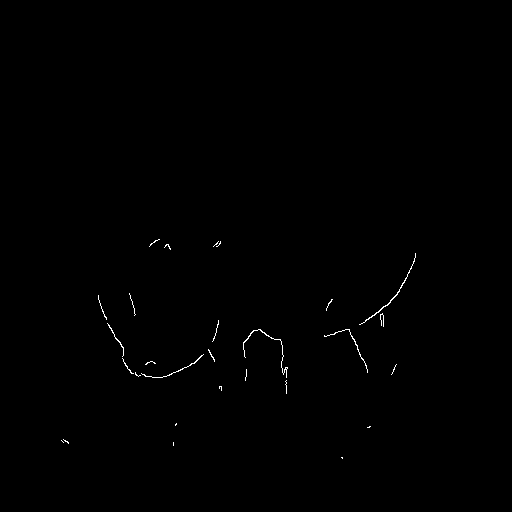

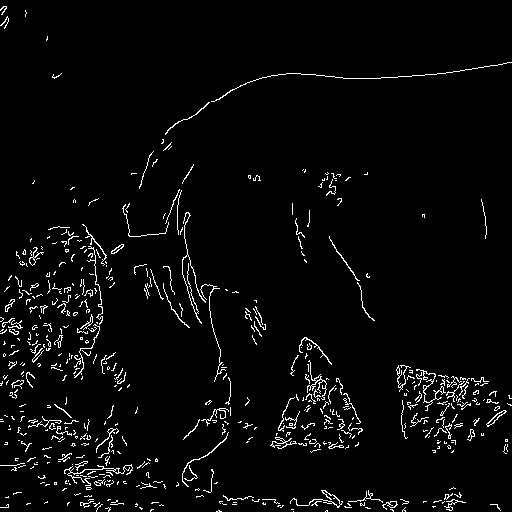

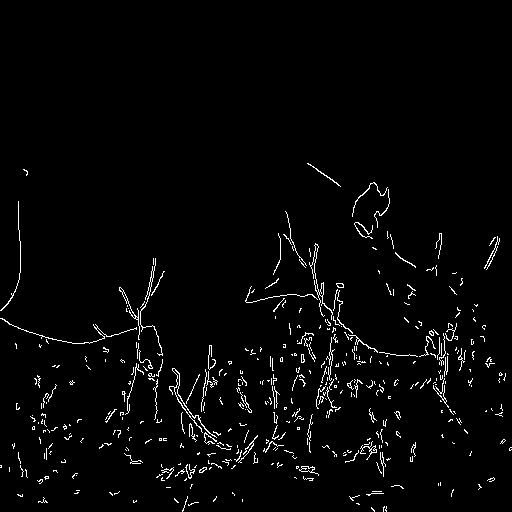

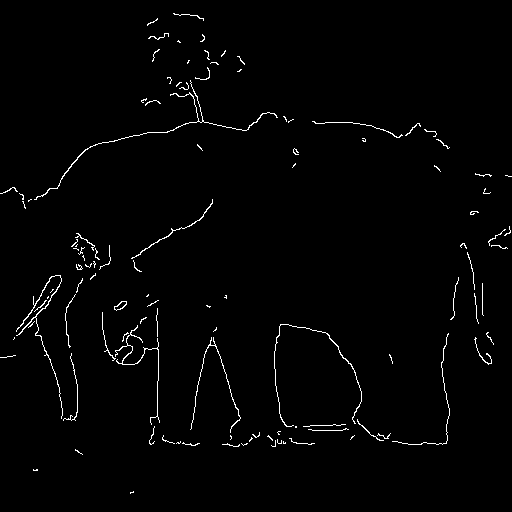

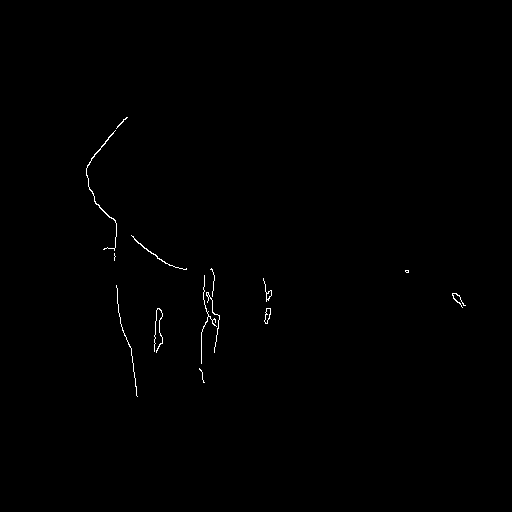

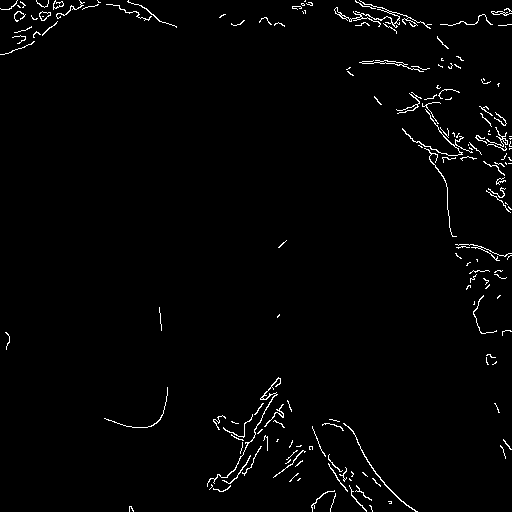

In [ ]:
for i in range(len(list_pre)):
  cv2_imshow(list_pre[i])

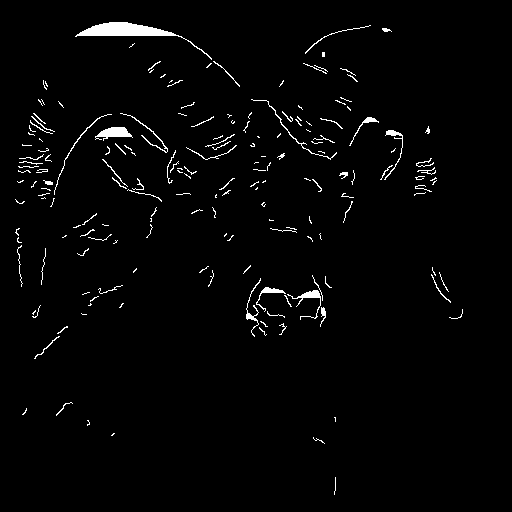

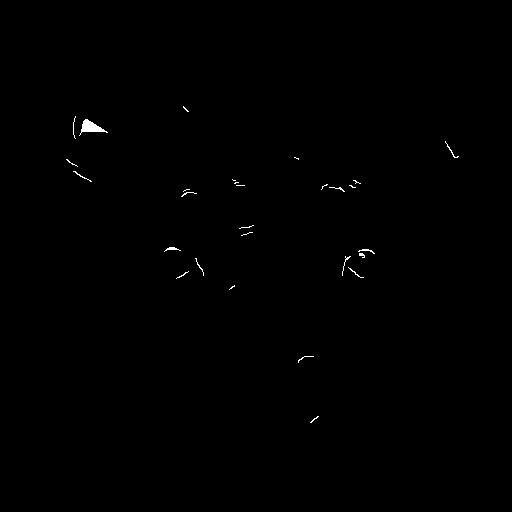

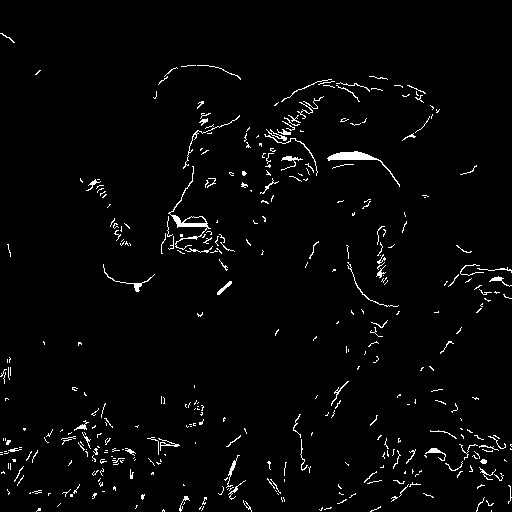

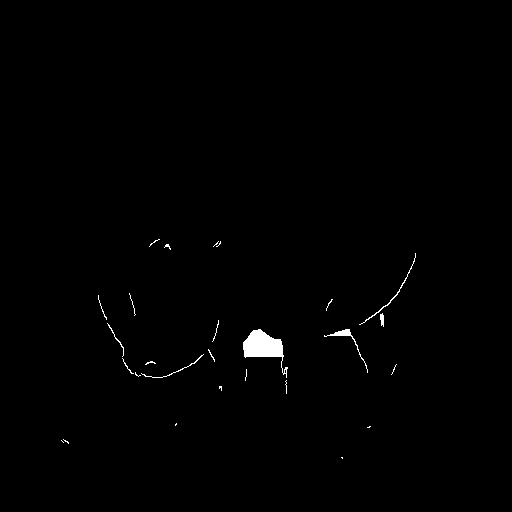

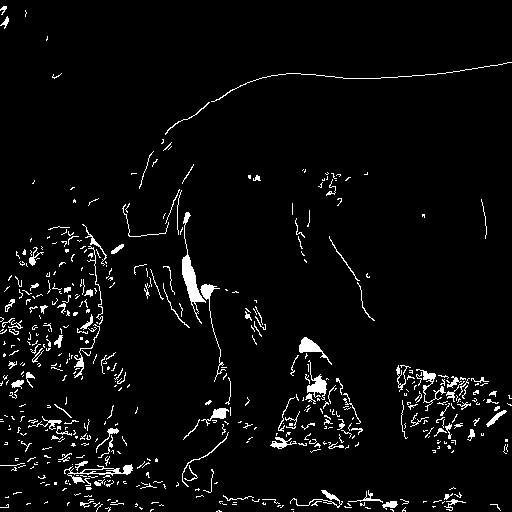

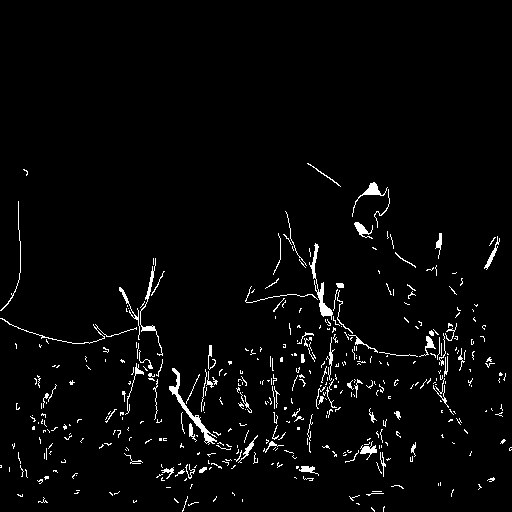

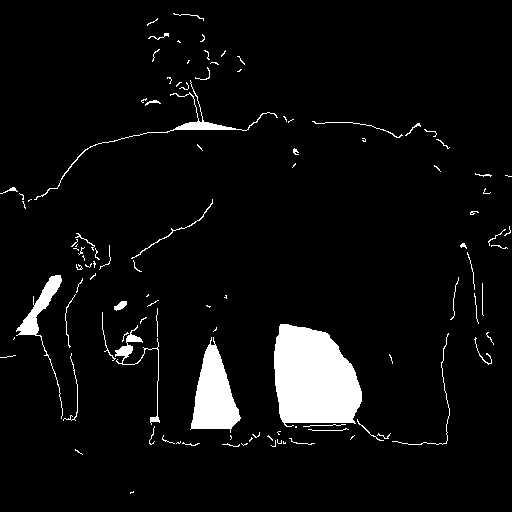

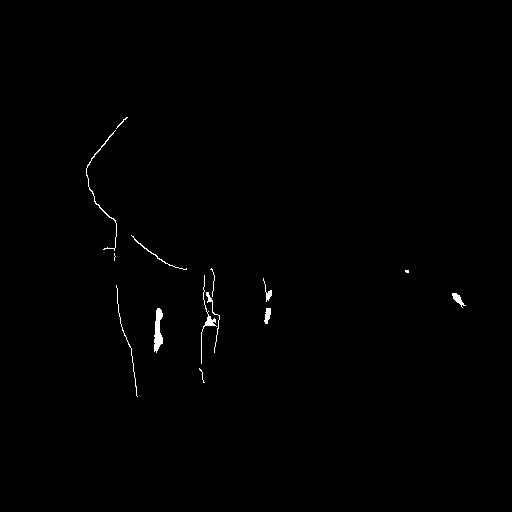

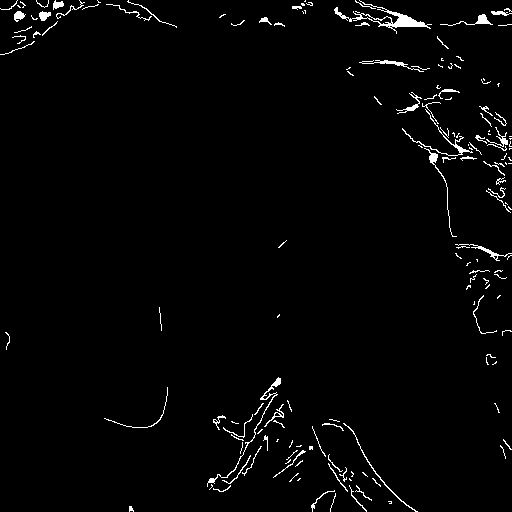

In [ ]:
for i in range(len(list_mask)):
  cv2_imshow(list_mask[i])

In [ ]:
# Hàm để lấy các ảnh gt từ folder
list_gt = []
def Thesh_GT(folder):
  for filename in sorted(os.listdir(folder)):
    img_path = os.path.join(folder,filename)
    img_tt = cv2.imread(img_path)
    graytt = cv2.cvtColor(img_tt, cv2.COLOR_BGR2GRAY)
    ret,thresh_gt = cv2.threshold(graytt,125,255, cv2.THRESH_BINARY_INV)
    list_gt.append(thresh_gt)


In [ ]:
Thesh_GT(dir_test)

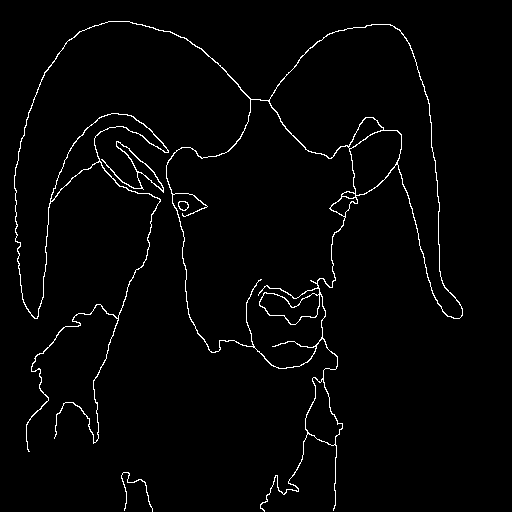

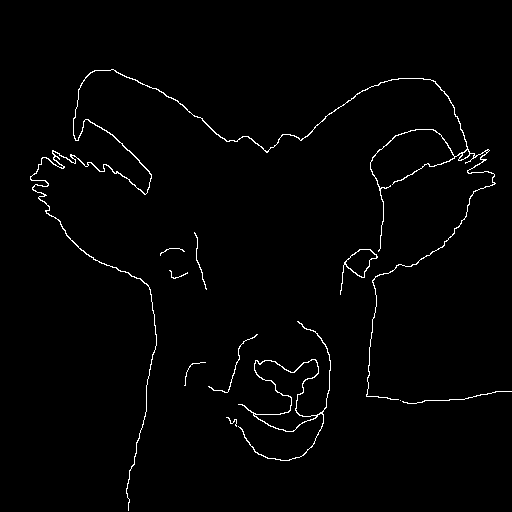

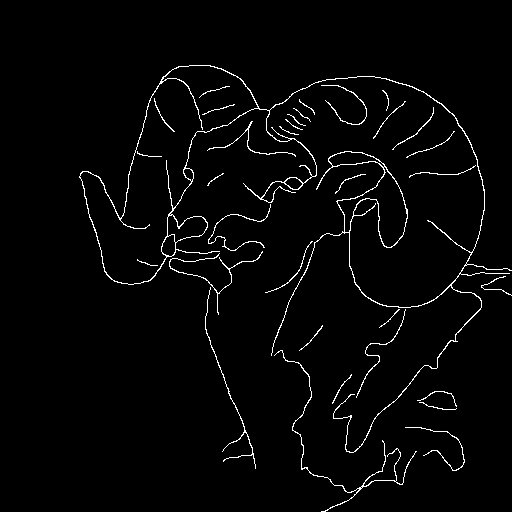

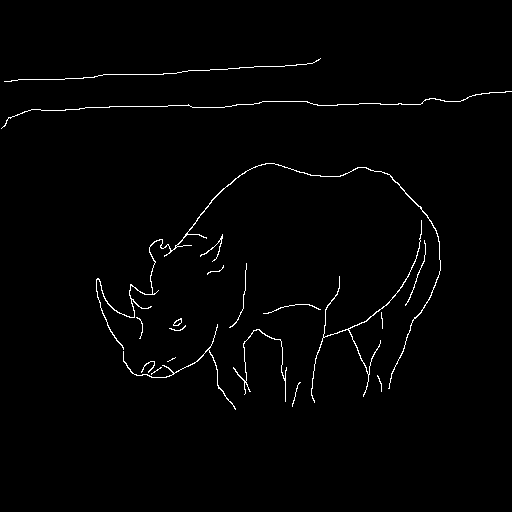

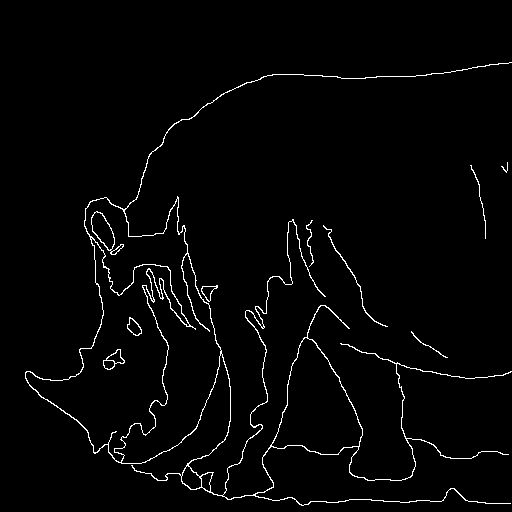

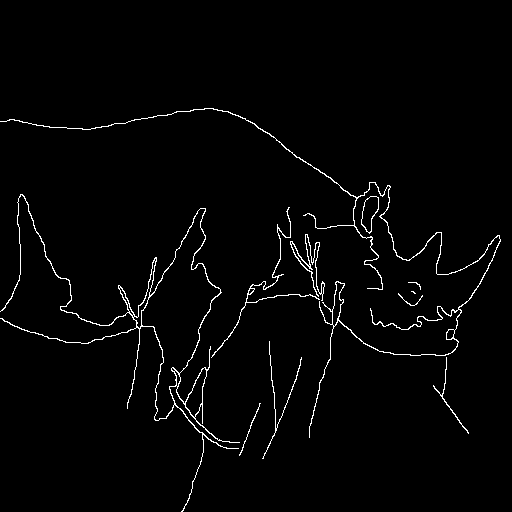

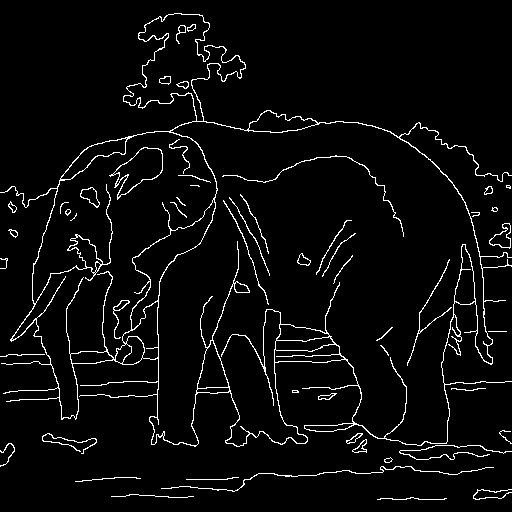

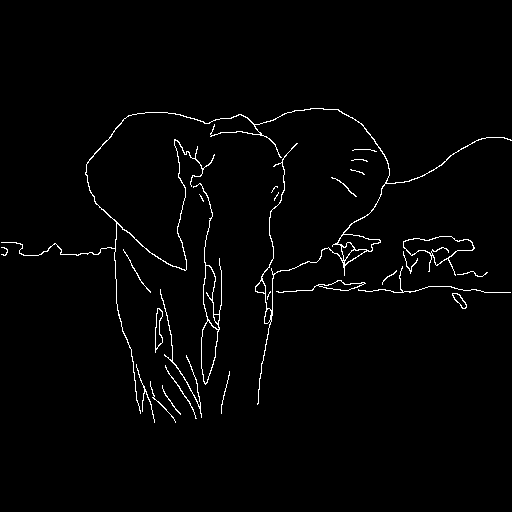

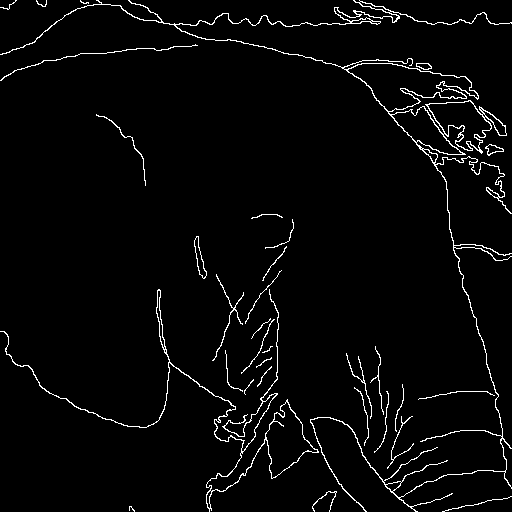

In [ ]:
# Các ảnh gt
for i in range(len(list_gt)):
  cv2_imshow(list_gt[i])

In [ ]:
# Hàm đánh giá độ chính xác của pp dựa vào pixel trên ảnh
def Cal_IoUimg(img_src,img_gt):
  TP = 0
  FP = 0
  FN = 0
  for x in range(img_gt.shape[0]): # duyệt theo chiều rộng ảnh
    for y in range(img_gt.shape[1]): # duyệt theo chiều cao ảnh
      if ((img_gt[x][y] == 255) and (img_src[x][y] == 255)):
        TP += 1
      elif ((img_gt[x][y] == 0)  and (img_src[x][y] == 255)):
        FP += 1
      elif ((img_gt[x][y] == 255)  and (img_src[x][y] == 0)):
        FN += 1
       
  IoU = TP  / (TP   + FP + FN)
  return IoU


In [ ]:
list_iou = []
def Cal_IoU(list_pre,list_gt):
  for i in range(len(list_pre)):
    iou = Cal_IoUimg(list_pre[i],list_gt[i])
    list_iou.append(iou)

In [ ]:
Cal_IoU(list_pre,list_gt)

In [ ]:
for i in list_iou:
  print(i)

0.11099360669134259
0.059455711561795806
0.09627614471452799
0.1393068469991547
0.08401340530584052
0.10429385772590818
0.1738747430680817
0.13088235294117648
0.16429864253393664


In [ ]:
def IoU(y_true, y_pred):
  intersection = np.sum(y_true*y_pred)
  y_true_area = np.sum(y_true)
  y_pred_area = np.sum(y_pred)
  combined_area = y_true_area + y_pred_area
  union_area = combined_area - intersection
  return (intersection) /(union_area)
